<a href="https://colab.research.google.com/github/WaithiraHawi/Derivative_Pricing/blob/main/European_and_American_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**European Calls and Puts**

In [1]:
import numpy as np

# Compute the European option price using the binomial model
def european_option_binomial(S0, K, T, r, sigma, N, option_type="call"):
    # Calculating time step size
    dt = T / N

    # Calculating up and down factors for the binomial tree
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor

    # Calculating the risk-neutral probability of an up move
    p = (np.exp(r * dt) - d) / (u - d)

    # the discount factor to compute present value
    discount = np.exp(-r * dt)

    # Initializing the stock price tree with zeros
    stock_prices = np.zeros((N + 1, N + 1))

    # Building the stock price tree by iterating over each time step
    for t in range(N + 1):  # Time steps
        for s in range(t + 1):  # Possible stock prices at each time step
            stock_prices[s, t] = S0 * (u ** (t - s)) * (d ** s)  # Stock price at each node

    # Initializing the option value tree with zeros
    option_values = np.zeros((N + 1, N + 1))

    # Computing the terminal option payoffs at maturity (T)
    if option_type == "call":
        option_values[:, N] = np.maximum(stock_prices[:, N] - K, 0)  # Call payoff
    else:
        option_values[:, N] = np.maximum(K - stock_prices[:, N], 0)  # Put payoff

    # backward induction to calculate option values at earlier time steps
    for t in range(N - 1, -1, -1):  # Start from the second-to-last step and move backward
        for s in range(t + 1):  # Iterating over all stock prices at this time step
            # Option value at each node is the discounted expected value of the next step
            option_values[s, t] = discount * (p * option_values[s, t + 1] + (1 - p) * option_values[s + 1, t + 1])

    # Return the option price at the initial time step (root of the tree)
    return option_values[0, 0]

# Given parameters for the option pricing model
S0 = 100  # Initial stock price
K = 100   # ATM strike price
T = 3/12  # Time to expiration in years (3 months)
r = 0.05  # Risk-free interest rate (5%)
sigma = 0.2  # Volatility (20%)
N = 100   # Number of steps in the binomial tree

# Computing option prices for call and put options
call_price = european_option_binomial(S0, K, T, r, sigma, N, "call")
put_price = european_option_binomial(S0, K, T, r, sigma, N, "put")

# Printing computed option prices
print(f"ATM European Call Price: {call_price:.4f}")
print(f"ATM European Put Price: {put_price:.4f}")

ATM European Call Price: 4.6050
ATM European Put Price: 3.3628


**European Delta**

In [2]:
import numpy as np
from scipy.stats import norm

# compute Delta of a European option using the Black-Scholes model
def black_scholes_delta(S0, K, T, r, sigma, option_type="call"):
    # Calculate d1
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    # Delta for a call option is the cumulative distribution function (CDF) of d1
    if option_type == "call":
        return norm.cdf(d1)  # For a call option, Delta is N(d1)
    else:
        return norm.cdf(d1) - 1  # For a put option, Delta is N(d1) - 1

# Given parameters for the Black-Scholes model
S0 = 100  # Initial stock price
K = 100   # ATM strike price (the price at which the option can be exercised)
T = 3/12  # Time to expiration in years (3 months)
r = 0.05  # Risk-free interest rate (5% annualized)
sigma = 0.2  # Volatility of the stock price (20% annualized)

# Compute Delta for a call option
call_delta = black_scholes_delta(S0, K, T, r, sigma, "call")

# Compute Delta for a put option
put_delta = black_scholes_delta(S0, K, T, r, sigma, "put")

# Output the results with formatting for readability
print(f"European Call Delta: {call_delta:.4f}")
print(f"European Put Delta: {put_delta:.4f}")

European Call Delta: 0.5695
European Put Delta: -0.4305


**Sensitivity**

In [ ]:
import numpy as np
from scipy.stats import norm

# Function to compute the Delta of a European option using the Black-Scholes model
def black_scholes_delta(S0, K, T, r, sigma, option_type="call"):
    # Calculate d1, which is used in both Delta and Vega calculations
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    # For a call option, Delta is the cumulative distribution function (CDF) of d1
    if option_type == "call":
        return norm.cdf(d1)  # Delta for a call option is N(d1)
    else:
        return norm.cdf(d1) - 1  # Delta for a put option is N(d1) - 1

# Function to compute Vega of a European option using the Black-Scholes model
def black_scholes_vega(S0, K, T, r, sigma):
    # Calculate d1, which is necessary for the Vega calculation
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    # Vega measures the sensitivity of the option price to volatility
    # It is the price change per 1% change in volatility
    return S0 * norm.pdf(d1) * np.sqrt(T)

# Given parameters for the Black-Scholes model
S0 = 100  # Initial stock price
K = 100   # ATM strike price (the price at which the option can be exercised)
T = 3/12  # Time to expiration in years (3 months)
r = 0.05  # Risk-free interest rate (5% annualized)
sigma = 0.2  # Volatility of the stock price (20% annualized)

# Compute Delta for a call option
call_delta = black_scholes_delta(S0, K, T, r, sigma, "call")

# Compute Delta for a put option
put_delta = black_scholes_delta(S0, K, T, r, sigma, "put")

# Compute Vega for the option with the given volatility (sigma = 0.2)
vega = black_scholes_vega(S0, K, T, r, sigma)

# Compute the change in Vega by simulating a 5% increase in volatility
# We use sigma = 0.25 to represent a 25% volatility
vega_change = black_scholes_vega(S0, K, T, r, 0.25) - vega  # Sensitivity to 5% increase in volatility

# Print the computed results with formatting for readability
print(f"European Call Delta: {call_delta:.4f}")  # Print Delta for the call option
print(f"European Put Delta: {put_delta:.4f}")    # Print Delta for the put option
print(f"Option Vega: {vega:.4f}")                # Print Vega for the option with volatility of 20%
print(f"Change in Option Price due to 5% increase in volatility: {vega_change:.4f}")  # Print change in Vega due to volatility increase

European Call Delta: 0.5695
European Put Delta: -0.4305
Option Vega: 19.6440
Change in Option Price due to 5% increase in volatility: 0.0415


**American Call Options**

Strike Price: 90.00, American Call Price: 10.0000
Strike Price: 95.00, American Call Price: 5.0000
Strike Price: 100.00, American Call Price: 0.3775
Strike Price: 105.00, American Call Price: 0.0040
Strike Price: 110.00, American Call Price: 0.0000


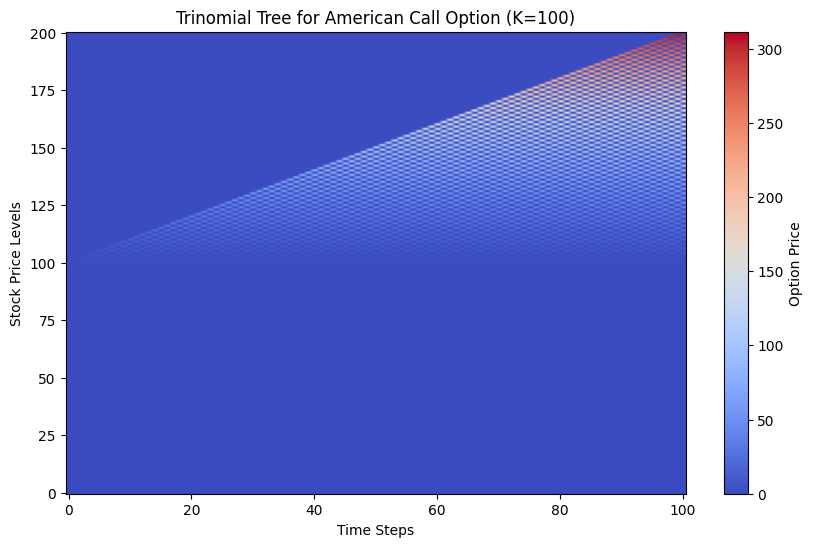

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def trinomial_tree_american_call(S0, K, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1
    pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) /
          (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    pm = 1 - pu - pd
    discount = np.exp(-r * dt)

    stock_tree = np.zeros((2 * N + 1, N + 1))
    stock_tree[N, 0] = S0
    for x in range(1, N + 1):
        for y in range(N - x, N + x + 1, 2):
            stock_tree[y, x] = S0 * (u ** ((y - N) // 2)) * (d ** ((N - y) // 2))

    option_tree = np.zeros_like(stock_tree)
    option_tree[:, -1] = np.maximum(stock_tree[:, -1] - K, 0)

    for x in range(N - 1, -1, -1):
        for y in range(N - x, N + x + 1, 2):
            option_tree[y, x] = discount * (pu * option_tree[y - 1, x + 1] +
                                            pm * option_tree[y, x + 1] +
                                            pd * option_tree[y + 1, x + 1])
            option_tree[y, x] = max(option_tree[y, x], stock_tree[y, x] - K)

    return option_tree, stock_tree, option_tree[N, 0]

S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100  # Number of time steps
strike_prices = [0.9 * S0, 0.95 * S0, S0, 1.05 * S0, 1.1 * S0]

option_prices = {}
stock_trees = {}
option_trees = {}

for K in strike_prices:
    option_tree, stock_tree, price = trinomial_tree_american_call(S0, K, r, sigma, T, N)
    option_prices[K] = price
    stock_trees[K] = stock_tree
    option_trees[K] = option_tree
    print(f"Strike Price: {K:.2f}, American Call Price: {price:.4f}")

# Visualization for one strike price (ATM)
K_atm = S0
plt.figure(figsize=(10, 6))
plt.imshow(option_trees[K_atm], cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(label='Option Price')
plt.title(f'Trinomial Tree for American Call Option (K={K_atm})')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price Levels')
plt.show()

**American Put Options**

In [ ]:
import numpy as np

# Trinomial tree for American put option pricing
def trinomial_tree_american_put(S0, K, T, r, sigma, N):
    """
    Computes the price of an American put option using a trinomial tree.

    Parameters:
    S0 : float  -> Initial stock price
    K : float   -> Strike price
    T : float   -> Time to maturity (in years)
    r : float   -> Risk-free interest rate
    sigma : float -> Volatility of the underlying stock
    N : int     -> Number of time steps in the trinomial tree

    Returns:
    float       -> The estimated American put option price
    """

    # Time step size
    dt = T / N

    # Trinomial tree parameters
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up factor
    d = 1 / u                            # Down factor
    m = 1                                 # Middle state factor (no price change)

    # Risk-neutral probabilities
    p_u = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) /
           (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    p_d = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) /
           (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2)))) ** 2
    p_m = 1 - p_u - p_d  # Probability of staying in the middle state

    # Discount factor for present value calculations
    discount = np.exp(-r * dt)

    # Stock price tree initialization
    stock_prices = np.zeros((2 * N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(2 * i + 1):
            stock_prices[j, i] = S0 * (u ** max(i - j, 0)) * (d ** max(j - i, 0))

    # Option price tree initialization
    option_values = np.zeros((2 * N + 1, N + 1))

    # Compute the payoff at maturity (for a put option: max(K - S, 0))
    option_values[:, N] = np.maximum(K - stock_prices[:, N], 0)

    # Backward induction to determine the option price at each node
    for i in range(N - 1, -1, -1):  # Move backwards from maturity to present
        for j in range(2 * i + 1):
            # Expected discounted value if held to expiration
            hold_value = discount * (p_u * option_values[j, i + 1] +
                                     p_m * option_values[j + 1, i + 1] +
                                     p_d * option_values[j + 2, i + 1])

            # American option feature: max(early exercise, holding value)
            option_values[j, i] = max(K - stock_prices[j, i], hold_value)

    return option_values[0, 0]  # Return the option price at the root node

# Given parameters
S0 = 100    # Initial stock price
T = 3/12    # 3 months to expiration (converted to years)
r = 0.05    # 5% annual risk-free interest rate
sigma = 0.2 # 20% volatility
N = 100     # Number of steps in the trinomial tree

# Strike prices: Deep OTM (Out of The Money), OTM, ATM (At The Money), ITM (In The Money), Deep ITM
strike_prices = [90, 95, 100, 105, 110]

# Compute American Put Prices for different strike prices
put_prices = {K: trinomial_tree_american_put(S0, K, T, r, sigma, N) for K in strike_prices}

# Display results
for K, price in put_prices.items():
    print(f"American Put Price (K={K}): {price:.4f}")

American Put Price (K=90): 0.5643
American Put Price (K=95): 1.5755
American Put Price (K=100): 3.4761
American Put Price (K=105): 6.4261
American Put Price (K=110): 10.3299


**American Call and Puts**

In [3]:
import numpy as np
from scipy.stats import norm

# Given parameters
S0 = 100       # Initial stock price
r = 0.05       # Risk-free interest rate
sigma = 0.20   # Volatility
T = 0.25       # Time to expiration in years
K = 100        # Strike price (assuming ATM option for simplicity)

# Function to calculate d1 and d2 for Black-Scholes formula
def calculate_d1_d2(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

# Function to calculate call and put prices using Black-Scholes formula
def black_scholes_price(S0, K, r, sigma, T):
    d1, d2 = calculate_d1_d2(S0, K, r, sigma, T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return call_price, put_price

call_price, put_price = black_scholes_price(S0, K, r, sigma, T)

print(f"Call Price: {call_price:.2f}")
print(f"Put Price: {put_price:.2f}")


Call Price: 4.61
Put Price: 3.37


In [4]:
import numpy as np

# Parameters
S0 = 100       # Initial stock price
K = 100        # Strike price
r = 0.05       # Risk-free interest rate
sigma = 0.20   # Volatility
T = 0.25       # Time to expiration (in years)
N = 100        # Number of time steps

# Binomial tree parameters
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)

# Initialize asset prices at maturity
ST = np.zeros(N+1)
for i in range(N+1):
    ST[i] = S0 * (u ** (N - i)) * (d ** i)

# Initialize option values at maturity
call_values = np.maximum(0, ST - K)
put_values = np.maximum(0, K - ST)

# Step back through the tree
for j in range(N-1, -1, -1):
    for i in range(j+1):
        call_values[i] = np.exp(-r * dt) * (p * call_values[i] + (1 - p) * call_values[i + 1])
        call_values[i] = np.maximum(call_values[i], S0 * (u ** (j - i)) * (d ** i) - K)  # American option

        put_values[i] = np.exp(-r * dt) * (p * put_values[i] + (1 - p) * put_values[i + 1])
        put_values[i] = np.maximum(put_values[i], K - S0 * (u ** (j - i)) * (d ** i))  # American option

call_price = call_values[0]
put_price = put_values[0]

print(f"American Call Price: {call_price:.2f}")
print(f"American Put Price: {put_price:.2f}")

American Call Price: 4.61
American Put Price: 3.47


In [6]:
# Calculate delta for American call option
call_delta = (call_values[1] - call_values[0]) / (S0 * u - S0 * d)

# Calculate delta for American put option
put_delta = (put_values[1] - put_values[0]) / (S0 * u - S0 * d)

print(f"American Call Delta: {call_delta:.2f}")
print(f"American Put Delta: {put_delta:.2f}")

American Call Delta: -0.29
American Put Delta: 0.23


In [7]:
# Calculate gamma for American call option
call_gamma = ((call_values[2] - call_values[1]) / (S0 * u * u - S0) -
             (call_values[1] - call_values[0]) / (S0 - S0 * d * d)) / ((S0 * u * u - S0 * d * d) / 2)

# Calculate gamma for American put option
put_gamma = ((put_values[2] - put_values[1]) / (S0 * u * u - S0) -
            (put_values[1] - put_values[0]) / (S0 - S0 * d * d)) / ((S0 * u * u - S0 * d * d) / 2)

print(f"American Call Gamma: {call_gamma:.2f}")
print(f"American Put Gamma: {put_gamma:.2f}")


American Call Gamma: 0.01
American Put Gamma: 0.01


**European Options- Trinomial tree**

In [8]:
import numpy as np

# Parameters
S0 = 100       # Initial stock price
r = 0.05       # Risk-free interest rate
sigma = 0.20   # Volatility
T = 0.25       # Time to expiration (in years)
N = 100        # Number of time steps

# Trinomial tree parameters
dt = T / N
u = np.exp(sigma * np.sqrt(2 * dt))
d = 1 / u
pu = ((np.exp(r * dt / 2) - d) / (u - d)) ** 2
pd = ((u - np.exp(r * dt / 2)) / (u - d)) ** 2
pm = 1 - pu - pd

# Function to calculate European option prices using the trinomial tree model
def trinomial_tree_european(S0, K, r, sigma, T, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    pu = ((np.exp(r * dt / 2) - d) / (u - d)) ** 2
    pd = ((u - np.exp(r * dt / 2)) / (u - d)) ** 2
    pm = 1 - pu - pd

    # Initialize asset prices at maturity
    ST = np.zeros(2 * N + 1)
    for i in range(2 * N + 1):
        ST[i] = S0 * (u ** max(0, N - i)) * (d ** max(0, i - N))

    # Initialize option values at maturity
    if option_type == 'call':
        option_values = np.maximum(0, ST - K)
    else:
        option_values = np.maximum(0, K - ST)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(2 * j + 1):
            option_values[i] = np.exp(-r * dt) * (pu * option_values[i] + pm * option_values[i + 1] + pd * option_values[i + 2])

    return option_values[0]

strike_prices = [110, 105, 100, 95, 90]
call_prices = [trinomial_tree_european(S0, K, r, sigma, T, N, 'call') for K in strike_prices]

for K, price in zip(strike_prices, call_prices):
    print(f"European Call Price for Strike {K}: {price:.2f}")


European Call Price for Strike 110: 0.97
European Call Price for Strike 105: 2.08
European Call Price for Strike 100: 4.00
European Call Price for Strike 95: 6.89
European Call Price for Strike 90: 10.69


In [9]:
put_prices = [trinomial_tree_european(S0, K, r, sigma, T, N, 'put') for K in strike_prices]

for K, price in zip(strike_prices, put_prices):
    print(f"European Put Price for Strike {K}: {price:.2f}")

European Put Price for Strike 110: 10.72
European Put Price for Strike 105: 6.90
European Put Price for Strike 100: 3.87
European Put Price for Strike 95: 1.83
European Put Price for Strike 90: 0.69


**Delta hedging**

In [10]:
import numpy as np

# Binomial Tree for American Put Option Pricing with Delta Hedging
def binomial_tree_american_put(S0, K, T, r, sigma, N):
    """
    Computes the price of an American put option using a binomial tree with delta hedging.

    Parameters:
    S0 : float  -> Initial stock price
    K : float   -> Strike price
    T : float   -> Time to maturity (in years)
    r : float   -> Risk-free interest rate
    sigma : float -> Volatility of the underlying stock
    N : int     -> Number of time steps in the binomial tree

    Returns:
    float       -> The estimated American put option price
    np.ndarray  -> Delta values at each node (hedging strategy)
    np.ndarray  -> Cash account values at each node (for tracking hedging costs)
    """

    # Time step size
    dt = T / N

    # Binomial tree parameters
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u                        # Down factor

    # Risk-neutral probability of moving up
    p = (np.exp(r * dt) - d) / (u - d)

    # Discount factor for present value calculations
    discount = np.exp(-r * dt)

    # Initialize stock price tree
    stock_prices = np.zeros((N + 1, N + 1))  # (y, x) represents price at node (y, x)

    # Fill the stock price tree
    for x in range(N + 1):  # Iterate over time steps
        for y in range(x + 1):  # Iterate over possible states at each step
            stock_prices[y, x] = S0 * (u ** (x - y)) * (d ** y)

    # Initialize option price tree
    option_values = np.zeros((N + 1, N + 1))

    # Compute option payoff at maturity (for a put option: max(K - S, 0))
    for y in range(N + 1):
        option_values[y, N] = max(K - stock_prices[y, N], 0)

    # Initialize arrays for Delta hedging and cash account tracking
    deltas = np.zeros((N, N))  # Stores delta values at each step
    cash_accounts = np.zeros((N, N))  # Stores cash holdings over time

    # Backward induction to determine the option price at each node
    for x in range(N - 1, -1, -1):  # Move backwards from maturity to present
        for y in range(x + 1):

            # Expected discounted value if held to expiration
            hold_value = discount * (p * option_values[y, x + 1] + (1 - p) * option_values[y + 1, x + 1])

            # Early exercise value for an American put option
            exercise_value = max(K - stock_prices[y, x], 0)

            # Choose the maximum value (American feature: exercise vs hold)
            option_values[y, x] = max(hold_value, exercise_value)

            # Compute Delta (hedging ratio)
            deltas[y, x] = (option_values[y, x + 1] - option_values[y + 1, x + 1]) / \
                           (stock_prices[y, x + 1] - stock_prices[y + 1, x + 1])

            # Track Cash Account (assumes hedging starts at step 0)
            if x > 0:
                cash_accounts[y, x] = cash_accounts[y, x - 1] * np.exp(r * dt) - \
                                      deltas[y, x] * (stock_prices[y, x] - stock_prices[y, x - 1])

    return option_values[0, 0], deltas, cash_accounts  # Return option price, deltas, and cash holdings

# Given parameters
S0 = 180    # Initial stock price
K = 182     # Strike price
T = 6/12    # 6 months to expiration (converted to years)
r = 0.02    # 2% annual risk-free interest rate
sigma = 0.25 # 25% volatility
N = 25      # Number of steps in the binomial tree

# Compute American Put Price and Delta Hedging Strategy
put_price, deltas, cash_accounts = binomial_tree_american_put(S0, K, T, r, sigma, N)


print(f"American Put Option Price: {put_price:.4f}")

# Display a sample path's Delta and cash account evolution
sample_step = 5  # Arbitrary step for illustration
print("\nDelta values at step 5:", deltas[:, sample_step])
print("\nCash account values at step 5:", cash_accounts[:, sample_step])

American Put Option Price: 13.0357

Delta values at step 5: [-0.12004652 -0.2353746  -0.39414482 -0.57497412 -0.74642385 -0.88223975
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]

Cash account values at step 5: [  0.89576798   1.63642573   2.55319077   3.47029573   4.19753611
 133.07178501   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


**Asian Options**

In [12]:
import numpy as np

# Parameters
S0 = 180  # Initial stock price
K = 182  # Strike price
r = -0.02  # Risk-free interest rate
sigma = 0.25  # Volatility
T = 0.5  # Time to maturity in years
n = 25  # Number of steps

# Binomial model parameters
dt = T / n
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)

# Initialize asset prices at each node
ST = np.zeros((n + 1, n + 1))
for i in range(n + 1):
    for j in range(i + 1):
        ST[j, i] = S0 * (u ** (i - j)) * (d ** j)

# Initialize average prices and option values at maturity
average_prices = np.zeros((n + 1, n + 1))
put_values = np.zeros((n + 1, n + 1))

for i in range(n + 1):
    for j in range(i + 1):
        average_prices[j, i] = (ST[j, i] + i * K) / (i + 1)  # Average price
        put_values[j, i] = np.maximum(K - average_prices[j, i], 0)

# Backward induction to find option price at t=0
for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        put_values[j, i] = np.exp(-r * dt) * (p * put_values[j, i + 1] + (1 - p) * put_values[j + 1, i + 1])

put_option_price = put_values[0, 0]
print(f"The price of the Asian ATM Put option is: {put_option_price:.2f}")

The price of the Asian ATM Put option is: 0.57
